In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
import morticia.rad.radute as radute 
from morticia.tools.xd import *
#import optics
# This notebook is used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.rad.radute
%aimport morticia.tools.xd
%autoreload 1

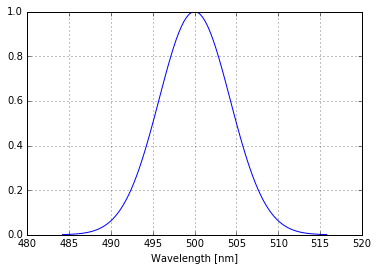

In [3]:
# Illustrate filter generation using rad.srfgen
w,y,wn,wu = radute.srfgen(center=500, fwhm=10, shape='gauss') # Center wavelength and full width at half maximum default to nm
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

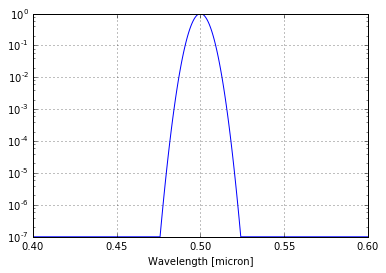

In [4]:
# Gaussian filter on log scale with some out-of-band leackage between 400 and 600 nm
w,y,wn,wu = radute.srfgen(center=500, fwhm=10, shape='gauss', yedge=1e-7, oob=1e-7, wvmin=400, wvmax=600)
plt.semilogy(wu, y)  # plot against wavelength in microns
plt.xlabel('Wavelength [micron]')
plt.grid()

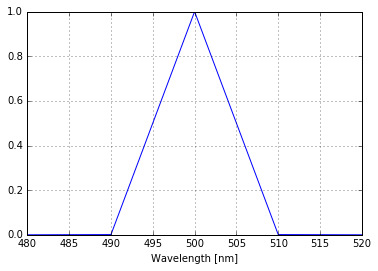

In [5]:
w,y,wn,wu = radute.srfgen(500, 10, shape='bartlett', wvmin=480, wvmax=520)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

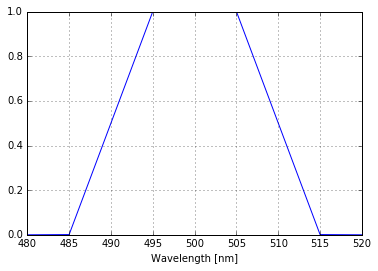

In [6]:
# Bartlett (triangular) again with insertion of center flat region of width 10 nm
w,y,wn,wu = radute.srfgen(500, 10, shape='bartlett', centerflat=10, wvmin=480, wvmax=520)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

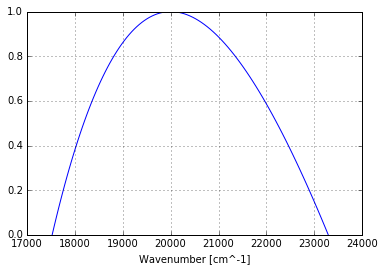

In [7]:
# Generate in wavelength space (nm by default) and plot in wavenumber space
w,y,wn,wu = radute.srfgen(500, 100, shape='welch') # center and full width at half max default to nm
plt.plot(wn, y)  #  plot against wavenumber per cm, note how the filter is obviously skewed in wavenumber space if 
# sufficienty wide
plt.xlabel('Wavenumber [cm^-1]')
plt.grid()

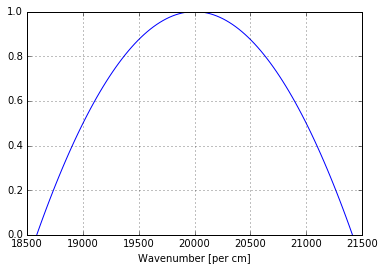

In [8]:
# Similar, but this time, generate the filter in wavenumber scale and also plot in wavenumber scale
w,y,wn,wu = radute.srfgen(20000.0, 2000.0, shape='welch', units='cm^-1')
plt.plot(wn, y)  #  plot against wavenumber per cm
plt.xlabel('Wavenumber [per cm]')
plt.grid()

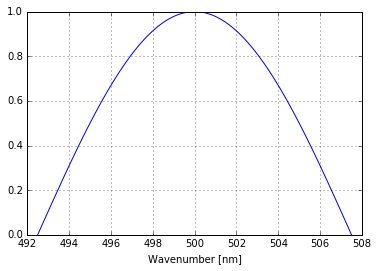

In [9]:
w,y,wn,wu = radute.srfgen(500, 10, shape='cosine')
plt.plot(w, y)
plt.xlabel('Wavenumber [nm]')
plt.grid()

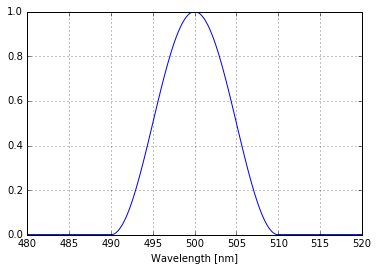

In [10]:
w,y,wn,wu = radute.srfgen(500, 10, shape='cos^2', wvmin=480, wvmax=520, oob=0.001)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

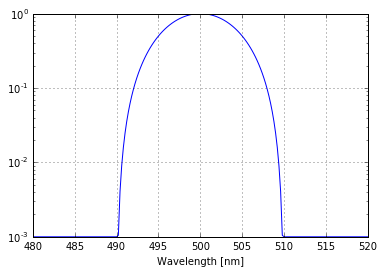

In [11]:
# Same, plotted on a log scale
plt.semilogy(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

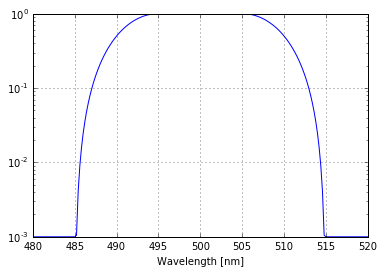

In [12]:
# Same as previous, but open a central flat region of 10 nm width
# Note that the full width at half max is now 20 nm (fwhm + centerflat)
w,y,wn,wu = radute.srfgen(500, 10, shape='cos^2', centerflat=10, wvmin=480, wvmax=520, oob=0.001)
plt.semilogy(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

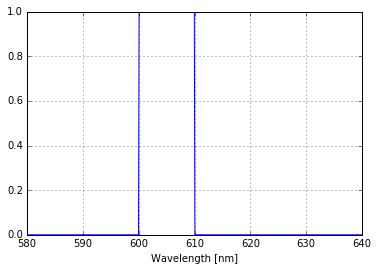

In [13]:
w,y,wn,wu = radute.srfgen(605, 10, shape='tophat', wvmin=580, wvmax=640)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

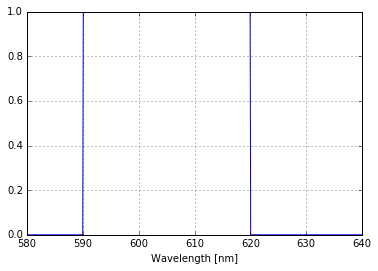

In [14]:
# Opening a centre flat region also works with tophats (box) although you could just increase fwhm
w,y,wn,wu = radute.srfgen(605, 10, shape='tophat', centerflat=20, wvmin=580, wvmax=640)
plt.plot(w, y)
plt.xlabel('Wavelength [nm]')
plt.grid()

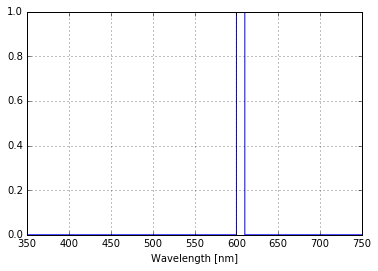

In [24]:
# Show the tophat function, which defines a tophat using only a few points
w,y,wn,wu = radute.tophat(605, 10, delta=0.001, wvmin=350, wvmax=750)
plt.plot(w,y)
plt.xlabel('Wavelength [nm]')
plt.grid()

In [16]:
# Create 3 MODTRAN-style flt filters/SRFs with different postions, widths and shapes
filt = radute.Flt('My Special Filters', filterheaders = ['a', 'b', 'c'], centers = [500, 600, 700], fwhms = [10, 20, 30],
               shapes=['gauss', 'cos^2', 'welch'])

In [17]:
# Write the filters/SRFs in MODTRAN .flt format to a text file
filt.write('./radata/SpecialFilters')

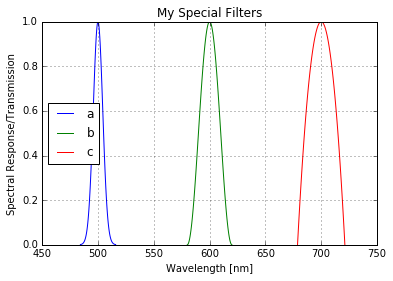

In [17]:
# Plot the filters
filt.plot()

In [ ]:
# Create some filters with just a few points
filt2 = radute.Flt('Hand Filters', filterheaders=['a', 'b'], filters=[np.array([[300, 0.5],[400, 1.0]]),
                                                                   np.array([[300, 0.3],[400, 0.2]])])

In [ ]:
filt2.plot()

In [ ]:
filt2

In [18]:
CIE = radute.Flt('./radata/CIEXYZ2.flt')

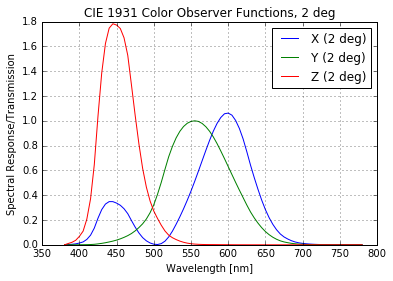

In [19]:
CIE.plot()

In [ ]:
CIE.name

In [ ]:
range(3)

In [ ]:
x[0].name

In [ ]:
y = CIE.flt_as_xd_harmonised()

In [ ]:
y['chn']

In [ ]:
y['wvl']

In [ ]:
y

In [ ]:
y.isel(chn=0).plot()
plt.grid()

In [20]:
# Read the aviris spectral response functions and convert to an xray.DataArray
AvirisFLT = radute.Flt('./radata/aviris.flt')

In [21]:
AvirisXD = AvirisFLT.flt_as_xd_harmonised(chn_start_index=0)

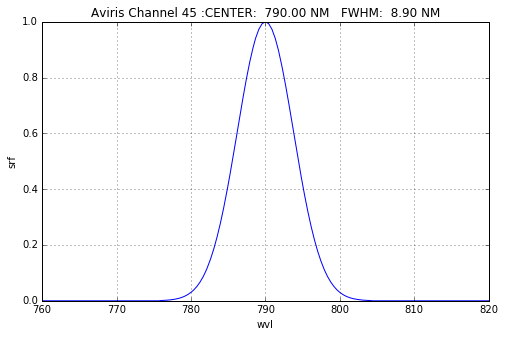

In [22]:
# Plot channel 45 (channel 46 if counting from 1)
plt.figure(figsize=(8,5))
AvirisXD.isel(chn=45).plot()
plt.xlim([760,820])
plt.title('Aviris Channel 45 :' + AvirisXD['chn'].labels[45])
plt.grid()

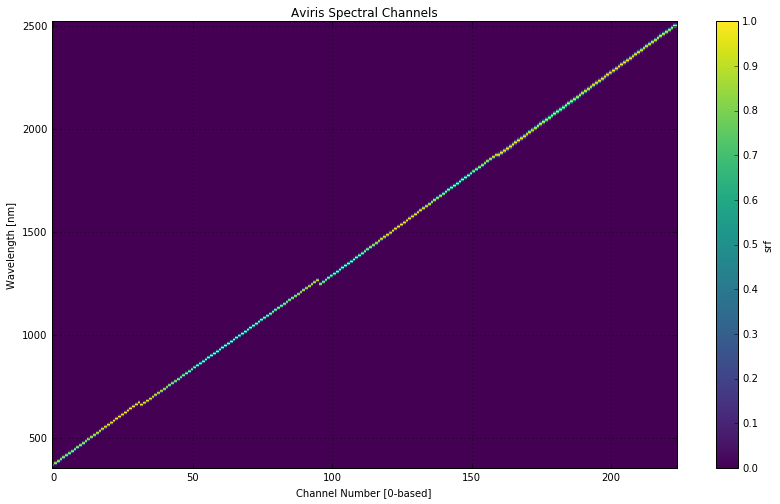

In [23]:
# Plot all channels (takes a few seconds)
plt.figure(figsize=(14,8))
AvirisXD.plot()
plt.title('Aviris Spectral Channels')
plt.xlabel('Channel Number [0-based]')
plt.ylabel('Wavelength [nm]')
plt.grid()

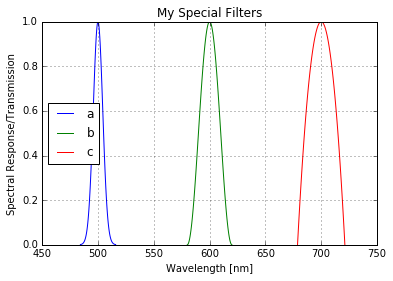

In [19]:
filt.plot()

In [20]:
z=filt.flt_as_xd_harmonised()

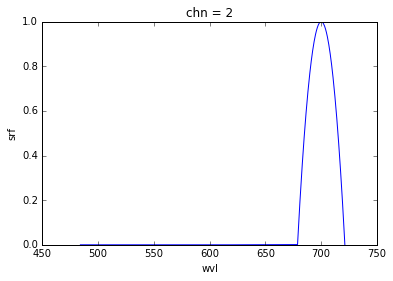

In [25]:
z.isel(chn=2).plot()

In [28]:
w,y,wn,wu = radute.tophat(605, 10, delta=0.001)

In [29]:
w

array([ 599.999,  600.   ,  600.001,  609.999,  610.   ,  610.001])